In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import atlite
import numpy as np



In [9]:
# Open the file
dataset = xr.open_dataset('C:/Users/marta/Desktop/Thesis/Climate-Change-Impacted-Solar-Energy-Generation/rsds_3hr_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_201001010130-201412312230.nc')


# Inspect dataset to confirm variable and coordinates
print(dataset)

# Select the 'rsds' variable for the first time step
rsds = dataset['rsds']

# Extract longitude and latitude
lon = dataset['lon']
lat = dataset['lat']

# Assuming rsds is a 3D array with dimensions (time, lat, lon)
# Select the time slice number 100
rsds_slice = rsds.isel(time=100)

# Create DataArray with correct dimensions
rsds= xr.DataArray(
    rsds_slice, 
    dims=['lat', 'lon'], 
    coords={'lat': lat, 'lon': lon}
)

<xarray.Dataset> Size: 1GB
Dimensions:    (time: 14608, bnds: 2, lat: 96, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 117kB 2010-01-01T01:30:00 ... 2014-12-31...
  * lat        (lat) float64 768B -88.57 -86.72 -84.86 ... 84.86 86.72 88.57
  * lon        (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 234kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    rsds       (time, lat, lon) float32 1GB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                cmip6-mpi-esm@dkrz.de
    ...                     ...
    title:                  MPI-ESM1-2-LR output prepared for CMIP6
    variable_id:            rsds
    variant_label:          r1i1p1f1
    license

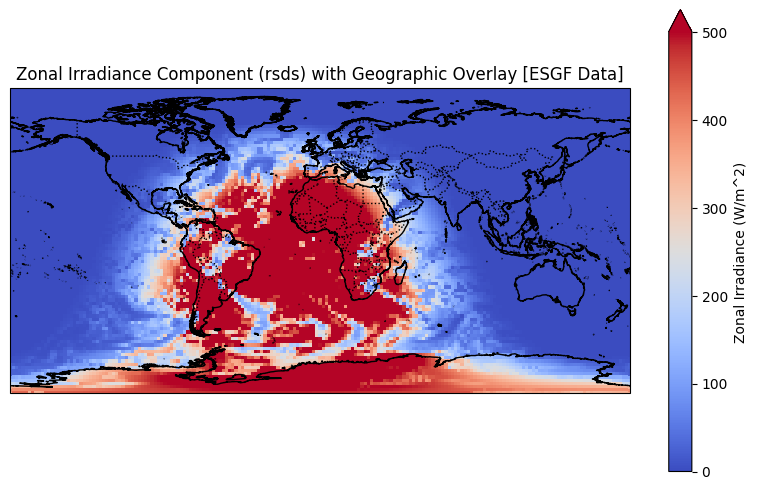

In [11]:
# Set up the plot with PlateCarree projection
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the zonal solar component, adjusting the color scale to range from 0 to 1000
solar_plot = rsds.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',
    vmin=0,  # Minimum value of the color scale
    vmax=500,  # Maximum value of the color scale
    cbar_kwargs={'label': 'Zonal Irradiance (W/m^2)'}
)

# Add map features for context
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')

# Set map extent based on data coordinates
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())

# Title and labels
plt.title('Zonal Irradiance Component (rsds) with Geographic Overlay [ESGF Data]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [21]:
# --- Step 1: Define the European Region with atlite Cutout ---
cutout = atlite.Cutout(
    path='europe_solar',
    module='era5',
    x=slice(-10, 20),  # Longitude: West Portugal to East Italy
    y=slice(35, 70),   # Latitude: South Spain to North Norway
    time='2011-01-01'  # Example time (matches dataset)
)

# Prepare the cutout (atlite requires this for analysis)
cutout.prepare()
print(cutout.data)



<xarray.Dataset> Size: 26MB
Dimensions:               (x: 121, y: 141, time: 24)
Coordinates:
  * x                     (x) float64 968B -10.0 -9.75 -9.5 ... 19.5 19.75 20.0
  * y                     (y) float64 1kB 35.0 35.25 35.5 ... 69.5 69.75 70.0
  * time                  (time) datetime64[ns] 192B 2011-01-01 ... 2011-01-0...
    lon                   (x) float64 968B dask.array<chunksize=(121,), meta=np.ndarray>
    lat                   (y) float64 1kB dask.array<chunksize=(141,), meta=np.ndarray>
Data variables: (12/15)
    height                (y, x) float32 68kB dask.array<chunksize=(141, 121), meta=np.ndarray>
    wnd100m               (time, y, x) float32 2MB dask.array<chunksize=(24, 141, 121), meta=np.ndarray>
    wnd_shear_exp         (time, y, x) float32 2MB dask.array<chunksize=(24, 141, 121), meta=np.ndarray>
    wnd_azimuth           (time, y, x) float32 2MB dask.array<chunksize=(24, 141, 121), meta=np.ndarray>
    roughness             (time, y, x) float32 2MB dask

c:\Users\marta\anaconda3\envs\myenv\Lib\site-packages\atlite\cutout.py:155: UserWarning: Arguments module, x, y, time are ignored, since cutout is already built.
  warn(


In [25]:
print(cutout.data.data_vars)


Data variables:
    height                (y, x) float32 68kB dask.array<chunksize=(141, 121), meta=np.ndarray>
    wnd100m               (time, y, x) float32 2MB dask.array<chunksize=(24, 141, 121), meta=np.ndarray>
    wnd_shear_exp         (time, y, x) float32 2MB dask.array<chunksize=(24, 141, 121), meta=np.ndarray>
    wnd_azimuth           (time, y, x) float32 2MB dask.array<chunksize=(24, 141, 121), meta=np.ndarray>
    roughness             (time, y, x) float32 2MB dask.array<chunksize=(24, 141, 121), meta=np.ndarray>
    influx_toa            (time, y, x) float32 2MB dask.array<chunksize=(24, 141, 121), meta=np.ndarray>
    influx_direct         (time, y, x) float32 2MB dask.array<chunksize=(24, 141, 121), meta=np.ndarray>
    influx_diffuse        (time, y, x) float32 2MB dask.array<chunksize=(24, 141, 121), meta=np.ndarray>
    albedo                (time, y, x) float32 2MB dask.array<chunksize=(24, 141, 121), meta=np.ndarray>
    solar_altitude        (time, y, x) float64 3

<xarray.DataArray (time: 24, y: 141, x: 121)> Size: 2MB
dask.array<add, shape=(24, 141, 121), dtype=float32, chunksize=(24, 141, 121), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 968B -10.0 -9.75 -9.5 -9.25 ... 19.25 19.5 19.75 20.0
  * y        (y) float64 1kB 35.0 35.25 35.5 35.75 ... 69.25 69.5 69.75 70.0
  * time     (time) datetime64[ns] 192B 2011-01-01 ... 2011-01-01T23:00:00
    lon      (x) float64 968B dask.array<chunksize=(121,), meta=np.ndarray>
    lat      (y) float64 1kB dask.array<chunksize=(141,), meta=np.ndarray>
<xarray.DataArray 'time' (time: 24)> Size: 192B
array(['2011-01-01T00:00:00.000000000', '2011-01-01T01:00:00.000000000',
       '2011-01-01T02:00:00.000000000', '2011-01-01T03:00:00.000000000',
       '2011-01-01T04:00:00.000000000', '2011-01-01T05:00:00.000000000',
       '2011-01-01T06:00:00.000000000', '2011-01-01T07:00:00.000000000',
       '2011-01-01T08:00:00.000000000', '2011-01-01T09:00:00.000000000',
       '2011-01-01T10:00:00.0000

IndexError: index 1293840000000000000 is out of bounds for axis 0 with size 24

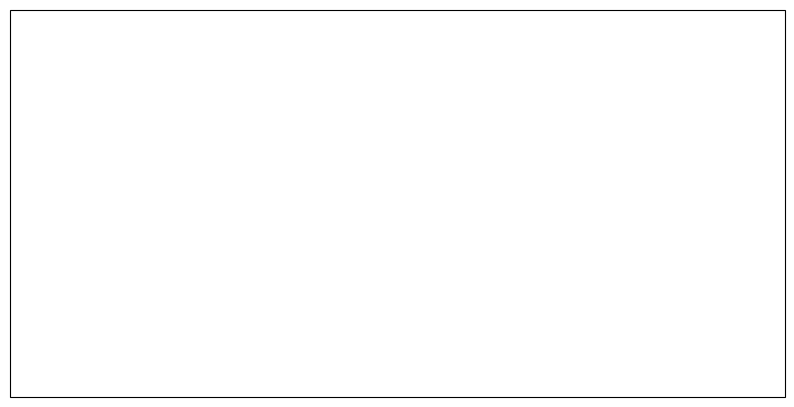

In [38]:
direct_irradiance=cutout.data.influx_direct
diffuse_irradiance=cutout.data.influx_diffuse
solar_irradiance= direct_irradiance+diffuse_irradiance
time=cutout.data.time
specific_time = "2011-01-01T00:00:00.000000000"
#rsds_at_time = rsds.sel(time=specific_time)

print(solar_irradiance)
print(time)
# Create the plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Select solar irradiance for 12:00 PM (noon)
solar_irradiance.isel(time=specific_time).plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='Reds',  # Red color scale for solar irradiance
    cbar_kwargs={'label': 'Solar irradiance (W/m^2)'}
)

# Add map features for context
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')

# Set extent to Europe
ax.set_extent([-10, 20, 35, 70], crs=ccrs.PlateCarree())

# Add title and labels
plt.title('Solar Irradiance over Europe [Atlite Data]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

Solar irradiance values at 2010-05-01T10:30:00:
[[7.3242188e-04 7.3242188e-04 7.3242188e-04 ... 7.3242188e-04
  7.3242188e-04 7.3242188e-04]
 [7.3242188e-04 7.3242188e-04 7.3242188e-04 ... 7.3242188e-04
  7.3242188e-04 7.3242188e-04]
 [7.3242188e-04 7.3242188e-04 7.3242188e-04 ... 7.3242188e-04
  7.3242188e-04 7.3242188e-04]
 ...
 [3.1171948e+02 3.2431323e+02 3.2520386e+02 ... 3.3417261e+02
  3.3461011e+02 3.0846948e+02]
 [3.1503198e+02 3.1420386e+02 3.2134448e+02 ... 2.9096948e+02
  3.0054761e+02 3.1345386e+02]
 [2.1796948e+02 2.1518823e+02 2.1798511e+02 ... 2.2612573e+02
  2.3451636e+02 2.1587573e+02]]


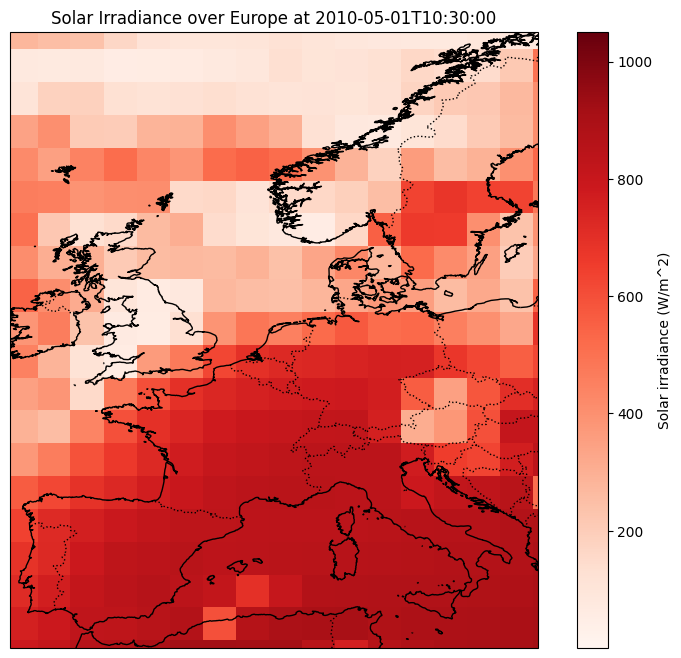

In [28]:
# Extract rsds (solar irradiance) and keep the time dimension intact
rsds = dataset['rsds']  # Ensure 'rsds' has the 'time' dimension

# Select solar irradiance for the specific time
specific_time = "2010-05-01T10:30:00"
rsds_at_time = rsds.sel(time=specific_time)

# Print the selected data values
print(f"Solar irradiance values at {specific_time}:")
print(rsds_at_time.values)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the solar irradiance at the selected time
rsds_at_time.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='Reds',  # Red color scale for solar irradiance
    cbar_kwargs={'label': 'Solar irradiance (W/m^2)'}
)

# Add map features for context
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')

# Set extent to Europe
ax.set_extent([-10, 20, 35, 70], crs=ccrs.PlateCarree())

# Add title and labels
plt.title(f'Solar Irradiance over Europe at {specific_time}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()



In [33]:
rsds = dataset['rsds']  # Ensure 'rsds' has the 'time' dimension


In [30]:
# Interpolate irradiance onto the Atlite cutout grid because ESFG has dif coordinates than atlite
#force arrays to the same lenghts
irradiance_on_cutout = rsds_at_time.interp(
    lon=cutout.grid.x,
    lat=cutout.grid.y,
    method='linear'
)

MemoryError: Unable to allocate 21.4 GiB for an array with shape (17061, 335984) and data type float32

KeyboardInterrupt: 

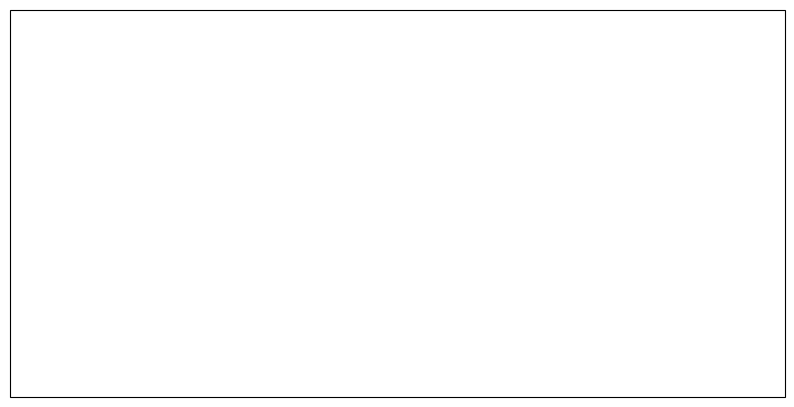

In [14]:
# --- Step 1: Ensure Irradiance Data is Sorted ---
irradiance_on_cutout = irradiance_on_cutout.sortby('lat').sortby('lon')

# --- Step 2: Plot the Interpolated Irradiance ---
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the sorted irradiance data
irradiance_on_cutout.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='viridis',
    cbar_kwargs={'label': 'Irradiance (W/M^2)'}
)

# --- Step 3: Add Geographic Features ---
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')

# --- Step 4: Set Map Extent to the Cutout Region ---
bounds = cutout.grid.total_bounds
ax.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]], crs=ccrs.PlateCarree())

# --- Step 5: Final Plot Settings ---
plt.title('Interpolated ESGF Irradiance over Atlite Cutout')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()